**HOMEWORK 4**

**Author**: Alberto Polo

**NYUID**: N19683411

*Description*: Examine downward bias in the OLS estimate of autocorrelation in an AR1 process, using Python and focusing on algorithm speed 

**Solution**

First, I import the standard libraries to be used. I'll make plots using *Matplotlib* and enlarge the font size of all plot elements. I also set the seed of the random number generator in *Numpy*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

import numpy as np
np.random.seed(1)

I'll use *Numba* to improve code performance

In [2]:
from numba import jit

Then I define a function that simulates for $n$ periods an AR1 process with assigned persistence parameter $\alpha$. I also set the location parameter $\beta$ = 1, I initialize the process at the unconditional mean $\frac{\beta}{1-\alpha}$ and use a burn-in period of 500 to avoid having all histories starting too close to the unconditional mean

In [3]:
def AR1(alpha, n):
    burn = 500
    T = burn + n
    
    beta = 1.0
    
    w = np.random.randn(T)
    x = np.empty(T+1)
    x[0] = beta / (1 - alpha)
    
    for t in range(T):
        x[t+1] = alpha * x[t] + beta + w[t]
    
    return x[burn:-1]

Next I define a function which takes $\alpha$, $n$ and the desired number of simulations $Nsim$ to be used in computing the average of the OLS estimator. The function returns the average of the OLS estimates of the autocorrelation coefficient

In [4]:
def acorr_ols(alpha, n, Nsim):
    av_ols = 0    
    for i in range(Nsim):
        x = AR1(alpha, n)
        vcov = np.cov(x[:-1],x[1:])
        av_ols += vcov[0][1]/vcov[0][0]
    return av_ols/Nsim

I *Numbafy* the previous function in order to increase speed

In [5]:
acorr_ols_numba = jit(acorr_ols)

Finally I define a short function which serially computes the estimator bias given a list of sample size values for which we're interested to know what the bias is

In [6]:
def bias_by_size(alpha, Nsim, size_list):
    return [acorr_ols_numba(alpha, int(l), Nsim) - alpha for l in size_list]

Now that all functions have been defined, I set the remaining algorithm values. I choose to run 10,000 simulations in order to compute averages of OLS estimates, I write the list of values for $\alpha$ we're interested in, and I also write a vector of sample size values for which we want to compute the bias

In [7]:
Nsim = 10000
alphas = [0.5, 0.6, 0.7, 0.8, 0.9]
size_list = np.linspace(50, 500, 10)

The last step is to iteratively compute bias for each value of $\alpha$ we're interested in, appending the values as different lines in the graph

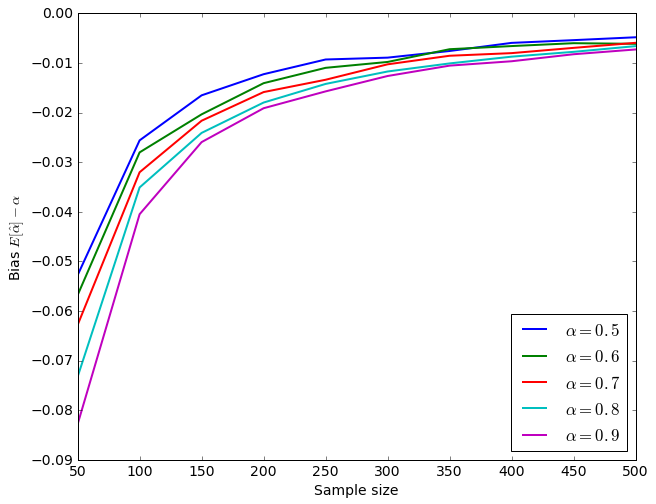

In [8]:
fig, ax = plt.subplots(figsize = (10,8))
for alpha in alphas:
    bias = bias_by_size(alpha, Nsim, size_list)
    current_label = r'$\alpha = {0:.1f}$'.format(alpha)
    ax.plot(size_list, bias, linewidth=2, label = current_label)

plt.title('')
plt.xlabel('Sample size')
plt.ylabel('Bias ' r'$E[\hat{\alpha}]-\alpha$')
plt.legend(loc = 'lower right')
plt.show()

The plot shows that the downward OLS bias is decreasing with sample size and is increasing as persistence gets closer to 1